# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Displaying some MNIST fashion items

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

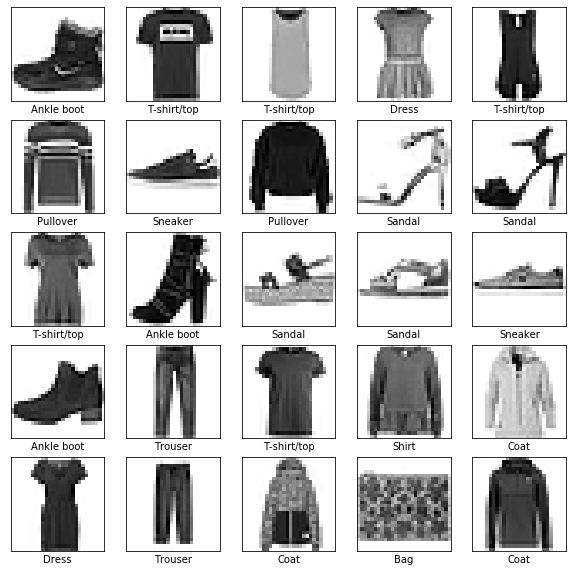

In [47]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

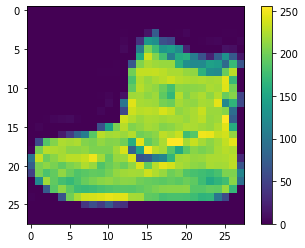

In [48]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Model 1 - Underfitting

In [0]:
# set up the layers
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# compile the model
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
# train the model
epochs = 20
history = model1.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 1.8958 - acc: 0.2157 - val_loss: 1.6799 - val_acc: 0.3078
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 1.6194 - acc: 0.3179 - val_loss: 1.5775 - val_acc: 0.3240
Epoch 3/20
60000/60000 [==============================] - 3s 52us/sample - loss: 1.5503 - acc: 0.3427 - val_loss: 1.5317 - val_acc: 0.3483
Epoch 4/20
60000/60000 [==============================] - 3s 50us/sample - loss: 1.5128 - acc: 0.3545 - val_loss: 1.4996 - val_acc: 0.3532
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 1.4885 - acc: 0.3601 - val_loss: 1.4828 - val_acc: 0.3670
Epoch 6/20
60000/60000 [==============================] - 3s 49us/sample - loss: 1.4708 - acc: 0.3668 - val_loss: 1.4690 - val_acc: 0.3678
Epoch 7/20
60000/60000 [==============================] - 3s 48us/sample - loss: 1.4575 - acc: 0.3734 - val_loss: 1.

In [24]:
# Evaluate accuracy
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1)

10000/10000 [==============================] - 0s 22us/sample - loss: 1.4009 - acc: 0.3993
Test accuracy: 0.3993


In [0]:
# Training/test loss/accuracy during training
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

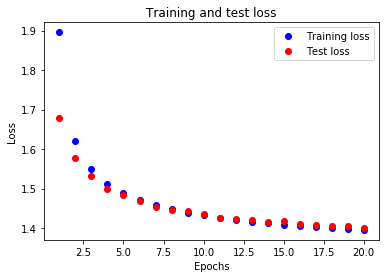

In [26]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

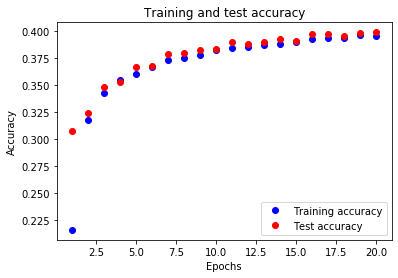

In [28]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 2 - Overfitting

In [0]:
# set up the layers
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# compile the model
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
# train the model
epochs = 20
history = model2.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4982 - acc: 0.8237 - val_loss: 0.4284 - val_acc: 0.8472
Epoch 2/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3744 - acc: 0.8644 - val_loss: 0.4101 - val_acc: 0.8525
Epoch 3/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3332 - acc: 0.8777 - val_loss: 0.3620 - val_acc: 0.8711
Epoch 4/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3107 - acc: 0.8851 - val_loss: 0.3654 - val_acc: 0.8674
Epoch 5/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2927 - acc: 0.8932 - val_loss: 0.3570 - val_acc: 0.8728
Epoch 6/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2776 - acc: 0.8979 - val_loss: 0.3406 - val_acc: 0.8773
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2658 - acc: 0.9016 - val_loss: 0.

In [40]:
# Evaluate accuracy
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc2)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3707 - acc: 0.8863
Test accuracy: 0.8863


In [0]:
# Training/test loss/accuracy during training
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

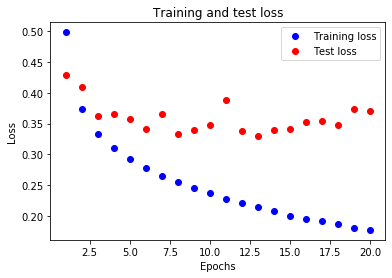

In [42]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

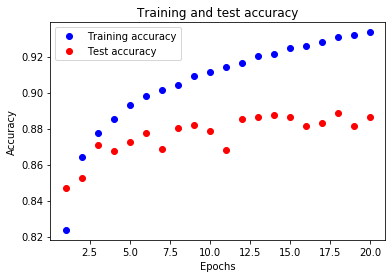

In [44]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 3 - Pretty Good

In [0]:
# set up the layers
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# compile the model
model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
# train the model
epochs = 10
history = model3.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5845 - acc: 0.7907 - val_loss: 0.4291 - val_acc: 0.8462
Epoch 2/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4291 - acc: 0.8456 - val_loss: 0.4071 - val_acc: 0.8517
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3926 - acc: 0.8573 - val_loss: 0.3710 - val_acc: 0.8656
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3704 - acc: 0.8653 - val_loss: 0.3681 - val_acc: 0.8670
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3517 - acc: 0.8712 - val_loss: 0.3660 - val_acc: 0.8677
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3415 - acc: 0.8745 - val_loss: 0.3570 - val_acc: 0.8713
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3280 - acc: 0.8801 - val_loss: 0.

In [32]:
# Evaluate accuracy
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc3)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3372 - acc: 0.8763
Test accuracy: 0.8763


In [0]:
# Training/test loss/accuracy during training
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

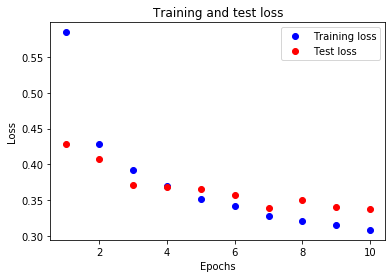

In [34]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

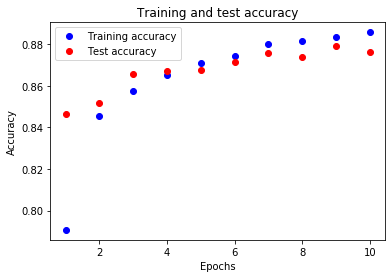

In [36]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

In [0]:
np.argmax(predictions[index])

In [0]:
test_labels[index]

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## Make prediction about a single image

In [0]:
index = 0
test_image = test_images[index]
print(test_image.shape)

In [0]:
# Add the image to a batch where it's the only member
test_image_single = (np.expand_dims(test_image, 0))
print(test_image_single.shape)

In [0]:
predictions_single = model.predict(test_image_single)
print(predictions_single)

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
plt.imshow(test_image, cmap=plt.cm.binary)
plt.grid(None)

In [0]:
np.argmax(predictions_single[0])

In [0]:
test_labels[index]